In [13]:
# Cell 1: Imports and Load
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../data/eval_results.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
print(df.head())

                       business_description  \
0       AI SaaS startup for Gen Z customers   
1       AI SaaS startup for Gen Z customers   
2       AI SaaS startup for Gen Z customers   
3  gaming mobile app with a global audience   
4  gaming mobile app with a global audience   

                                              domain relevance brandability  \
0  hibitJD autonomy Brew004 ESV Jr pawn Hancock a...      None         None   
1  JDreementatisfoother Participationreementmedia...      None         None   
2  Sher pawn Money stairs subst trilogyJDRocket M...      None         None   
3  ootherikenting credibilitypressikenpress auton...      None         None   
4  autonomyreementpress dispatch reviewingimura h...      None         None   

   safe  
0  None  
1  None  
2  None  
3  None  
4  None  


In [14]:
# Cell 2: Basic stats
print("Total suggestions:", len(df))
print("Missing scores:\n", df.isnull().sum())
print("Unsafe suggestions:", df[df['safe'] == False].shape[0])
print(df.describe())


Total suggestions: 30
Missing scores:
 business_description     0
domain                   0
relevance               30
brandability            30
safe                    30
dtype: int64
Unsafe suggestions: 0
                       business_description  \
count                                    30   
unique                                   10   
top     AI SaaS startup for Gen Z customers   
freq                                      3   

                                                   domain relevance  \
count                                                  30         0   
unique                                                 30         0   
top     hibitJD autonomy Brew004 ESV Jr pawn Hancock a...       NaN   
freq                                                    1       NaN   

       brandability safe  
count             0    0  
unique            0    0  
top             NaN  NaN  
freq            NaN  NaN  


In [15]:
# Cell 3: Relevance ranking
df_sorted_rel = df.sort_values(by="relevance")


In [17]:
# Cell 4: Brandability ranking
df_sorted_brand = df.sort_values(by="brandability")

print("🔴 Least brandable:")
print(df_sorted_brand[['business_description', 'domain', 'brandability']].head(5))

print("\n🟢 Most brandable:")
print(df_sorted_brand[['business_description', 'domain', 'brandability']].tail(5))

print("🔴 Least relevant:")
print(df_sorted_rel[['business_description', 'domain', 'relevance']].head(5))

print("\n🟢 Most relevant:")
print(df_sorted_rel[['business_description', 'domain', 'relevance']].tail(5))


🔴 Least brandable:
                       business_description  \
0       AI SaaS startup for Gen Z customers   
1       AI SaaS startup for Gen Z customers   
2       AI SaaS startup for Gen Z customers   
3  gaming mobile app with a global audience   
4  gaming mobile app with a global audience   

                                              domain brandability  
0  hibitJD autonomy Brew004 ESV Jr pawn Hancock a...         None  
1  JDreementatisfoother Participationreementmedia...         None  
2  Sher pawn Money stairs subst trilogyJDRocket M...         None  
3  ootherikenting credibilitypressikenpress auton...         None  
4  autonomyreementpress dispatch reviewingimura h...         None  

🟢 Most brandable:
                          business_description  \
25  gaming mobile app targeting remote workers   
26  gaming mobile app targeting remote workers   
27    animal shelter nonprofit in a small town   
28    animal shelter nonprofit in a small town   
29    animal shelter 

In [24]:
# Cell 5: Handle missing safe values and extract unsafe
df["safe"] = df["safe"].fillna(False)
unsafe_df = df[df["safe"] == False]


Total rows before dropna: 30
Total rows after dropna: 0


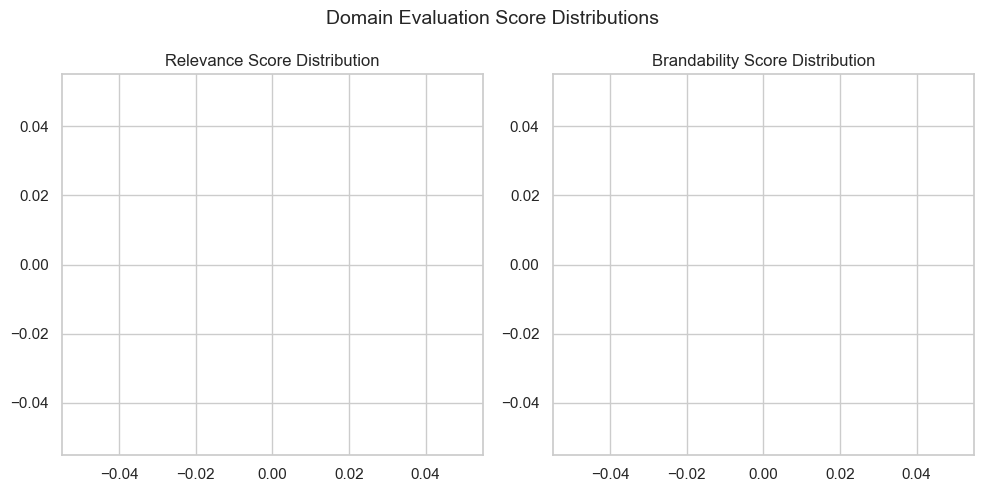

In [28]:
# Cell 6: Visual summary (corrected)
print(f"Total rows before dropna: {len(df)}")
df["relevance"] = pd.to_numeric(df["relevance"], errors="coerce")
df["brandability"] = pd.to_numeric(df["brandability"], errors="coerce")
df_plot = df.dropna(subset=["relevance", "brandability"])
print(f"Total rows after dropna: {len(df_plot)}")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_plot["relevance"], bins=10, kde=True)
plt.title("Relevance Score Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df_plot["brandability"], bins=10, kde=True)
plt.title("Brandability Score Distribution")

plt.suptitle("Domain Evaluation Score Distributions", fontsize=14)
plt.tight_layout()
plt.show()



In [26]:
# Cell 6b: Debug empty plots
print("df_plot shape:", df_plot.shape)
print("df_plot dtypes:\n", df_plot.dtypes)
print("Number of NaNs in relevance:", df_plot["relevance"].isnull().sum())
print("Number of NaNs in brandability:", df_plot["brandability"].isnull().sum())
print("Sample values:")
print(df_plot[["relevance", "brandability"]].head(10))

df_plot shape: (0, 6)
df_plot dtypes:
 business_description    object
domain                  object
relevance               object
brandability            object
safe                      bool
category                object
dtype: object
Number of NaNs in relevance: 0
Number of NaNs in brandability: 0
Sample values:
Empty DataFrame
Columns: [relevance, brandability]
Index: []


In [20]:
# Cell 7: Categorize failure types
def categorize(row):
    if not row["safe"]:
        return "Unsafe"
    elif row["relevance"] < 5:
        return "Low relevance"
    elif row["brandability"] < 5:
        return "Low brandability"
    else:
        return "Good"

df["category"] = df.apply(categorize, axis=1)

print("\n📊 Failure category distribution:")
print(df["category"].value_counts())


📊 Failure category distribution:
category
Unsafe    30
Name: count, dtype: int64


In [21]:
# Cell 8: Sample failure examples
print("\n🔍 Sample failure examples:")
print(df[df["category"] != "Good"][["business_description", "domain", "category"]].head(10))


🔍 Sample failure examples:
                                business_description  \
0                AI SaaS startup for Gen Z customers   
1                AI SaaS startup for Gen Z customers   
2                AI SaaS startup for Gen Z customers   
3           gaming mobile app with a global audience   
4           gaming mobile app with a global audience   
5           gaming mobile app with a global audience   
6  mental health counseling center with a global ...   
7  mental health counseling center with a global ...   
8  mental health counseling center with a global ...   
9             AI SaaS startup with a global audience   

                                              domain category  
0  hibitJD autonomy Brew004 ESV Jr pawn Hancock a...   Unsafe  
1  JDreementatisfoother Participationreementmedia...   Unsafe  
2  Sher pawn Money stairs subst trilogyJDRocket M...   Unsafe  
3  ootherikenting credibilitypressikenpress auton...   Unsafe  
4  autonomyreementpress dispatch re